## Equation 5 


In [1]:
 %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image

from numpy import sqrt,sin, cos,tan, pi

from qutip import *

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

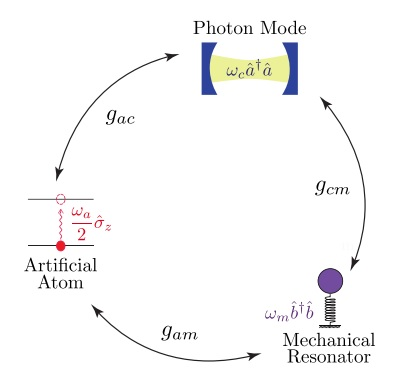

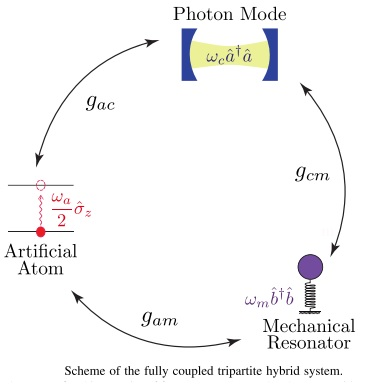

In [2]:
Image(filename='C:/Users/Ahmad/Desktop/2020/photo source/schematic.jpg',width=350, height=220)

### Hamiltonian For this fully coupled syestem:

$\Large \hat{H}_{0}=\omega_{c}\hat{a}^\dagger \hat{a}+ \frac{\omega_{a}}{2}\hat{\sigma}_{z}+\omega_m \hat{b}^\dagger \hat{b} \\
\Large \;\;\;\;\;\;\;\;\;\;\; ig_{ac}(\hat{\sigma}_{+}\hat{a}-\hat{\sigma}_{-}\hat{a}^\dagger) -
 g_{cm}\hat{a}^\dagger \hat{a}(\hat{b}+\hat{b}^\dagger) -
 g_{am} \hat{\sigma}_{z}(\hat{b}+\hat{b}^\dagger)$
 
 Basis for uncoupled Hamiltonian are $ (g_{ac}=g_{cm}=g_{am}=0) $ :{ $ \ket {g,e} \otimes \ket{k} \otimes\ket{l}\}_{k,l \in \mathbb{N}} $ 


The total $ \hat{H}_0$ commutes with polariton number operator $\hat{N}_{Polariton}= \hat{a}^\dagger\hat{a}+\hat{\sigma}_{+}\hat{\sigma}_{-} $ counting the number of photons and atomic excitations inside the cavity. this operator cummuts with total Hamiltonian, $[\hat{H}_0 , \hat{N}_{Polariton} ]=0$, which means the two operators share common basis in each subspace containing $n$ polaritons and thus total Hamiltonian in a basis of polariton number operator is <b>block-diagonal </b>.

the eigenvaluse and eigenvectors are: 
    
<font align="center">Eigenvalues:  ${\omega}^{(n)}_{\pm}= (n-\frac{1}{2}) \omega_c \pm \frac{1}{2} \sqrt{\Delta^2_{ac}+ 4n{g}^2_{ac}}$  </font>

and corresponding Eigenvectors: 

$~~~~~~  n=0:  ~\ket{G}= \ket{g}\otimes \ket{k=0} \\   $

$~~~ \forall \in \geq 1: ~~~ $

$~~~~~~~~~~~~~~~~~~~~\large \ket{+^{(n)}}=cos(\frac{\phi^{(n)}}{2}) \ket{g,n} -i sin(\frac{\phi^{(n)}}{2})) \ket{e,n-1} \\ $ 

$~~~~~~~~~~~~~~~~~~~~ \large \ket{-^{(n)}}=sin(\frac{\phi^{(n)}}{2}) \ket{g,n} +i cos(\frac{\phi^{(n)}}{2})) \ket{e,n-1}$


Here $ tan(\phi^{(n)}=  2 \sqrt{n}g_{ac} / \Delta_{ac} $ with $ \phi^{(n)} \in [-\pi / 2 , \pi / 2] $

$ {\sigma}_+^{(n)} = \ket{+^{(n)}} \bra{-^{(n)}}\doteq \mymatrix{c} {0&1 \\ 0&0} ~~~~~$
$ {\sigma}_-^{(n)} = \ket{-^{(n)}} \bra{+^{(n)}}\doteq \mymatrix{c} {0&0\\ 1&0} $

Now we write H as following (in the new basis)

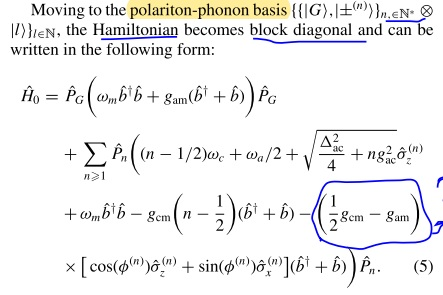

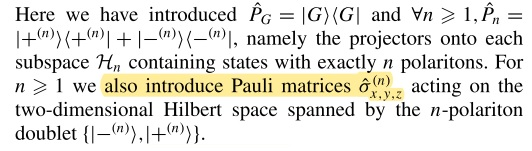

Main goal is to find eigenvalues as a function of atom-cavity coupling for n=0 and 1

(this diagram is for resonance case: when delta_ac=0 or wa=wc)

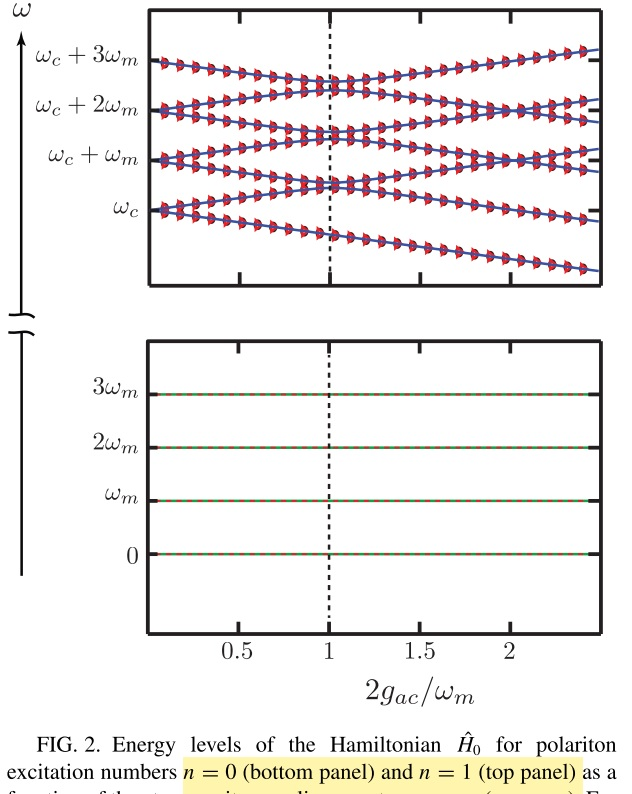

In [3]:
# excited basis(0,2)
#----------------parameters
#Nc = 10;      #### photons ##
Nm = 30;     ## phonon dimension  

n=1 
wm = 1.0                   #  mechanical frequency
wc = 100 * wm                  # cavity frequency.... 
wa = 1.0 *wc                      # resonance case

g_cm = wm/20.0         # cavity-phonon coupling
g_am = - wm/40.0       # its a sweeping value!
g_ac = wm/2.0         # cavity-atom coupling    this one sweeps
g_polr= g_cm - 2 * g_am #wm/10.0         # polariton-mechanics coupling.... g_polr= g_cm - 2g_am

delta_ac = wa-wc

#definng projector for n=0    n is polariton number
G = tensor(basis(2,1),basis(Nc,0))    # basis(2,1) or basis(1,0)??
P_G = G * G.dag()

# condition for cases delta_ac= zero. 

if (delta_ac==0) and (n ==0): 
    theta=0
elif (delta_ac !=0) and (n !=0): 
    theta = np.arctan(2*sqrt(n) * g_ac/delta_ac)
else: 
    theta=pi/2
        
# defining basis for case n != 0    
if (n>0):
    
    P = cos(theta/2) * tensor(basis(2,1),basis(Nc,n)) - 1j * sin(theta/2) * tensor(basis(2,0),basis(Nc,n-1))
    M = sin(theta/2) * tensor(basis(2,1),basis(Nc,n)) + 1j * cos(theta/2) * tensor(basis(2,0),basis(Nc,n-1))

    P_n = P * P.dag() + M * M.dag()
else: 
    P = G
    M = G
    P_n = 0

b = tensor(qeye(2), destroy(Nm))      # phonon anihilation opr for polariton-phonon basis
#b = tensor(qeye(2), qeye(Nc), destroy(Nm))

#defining pauli matrices in these basis:
#sigma_z = (P* P.dag() - M * M.dag())
#sigma_x = (P* M.dag() + M * P.dag())

sigma_z = tensor(sigmaz(),qeye(Nm)) 
sigma_x = tensor(sigmax(),qeye(Nm))
# identity operator 
#create()
I = tensor(qeye(2),identity(Nm))   # identity operator in the new basis
#I = tensor(identity(2),identity(Nc),identity(Nm))

In [4]:
g_aclist = np.linspace(0.0,2.5,100) * g_ac        # g_ac range 

# calcultaion of eigenvaluse as a function of g_am
idx = 0 
evals_mt = np.zeros((len(g_aclist), Nm*2))

# according to eq. 5 total H_0 can be consider as two parts:
# H_0= H_0G + H_0n.... H in ground basis and when n>=1
H_0G =  wm * b.dag() * b  + g_am *(b.dag() + b)
for g_ac in g_aclist:
    
    # when n=0
    #H_0 = ( wm * b.dag() * b  + g_am *(b.dag() + b))    # this is for case n=0
    
    #"""
    #while n >=1 : 
        
        # in general for n>=1 and arbitrart delta_ac and theta:
    H_0 =  I * ((n-1/2) * wc + 0.5 * wa)\
    + sqrt(n*(g_ac**2) + (delta_ac**2)/4) * sigma_z  \
    + wm * (b.dag() * b) - g_cm *(n-1/2) * (b.dag() + b)  \
    - (1/2 * g_polr) * (cos(theta) * sigma_z  + sin(theta) * sigma_x) *(b.dag() + b)  # * P_n    
     #   n = 0
    #H_0 = H_0n + H_0G
    #"""
    
    """
    eq. 6 
   # the above expression for case delta_ac=0 and theta=pi/2 should be as following:
    H_0 = I * (n * wc ) + sqrt(n)* (g_ac) * sigma_z + wm * (b.dag() * b) - g_cm *(n-1/2) * (b.dag() + b)  \
          - (1/2 *g_cm - g_am) * sigma_x* (b.dag() + b)  # * P_n         
        
    """
    evals, ekets = H_0.eigenstates()
    evals_mt[idx,:]=np.real(evals)
    idx += 1

In [5]:
#H_0
#hinton(H_0)
#H_0.isherm
#evals_mt[:,7]

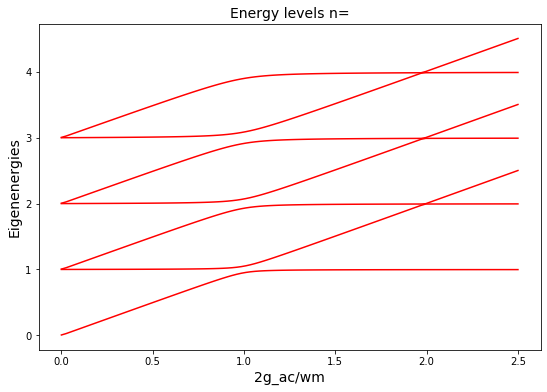

In [6]:
fig, ax = plt.subplots(1,1, figsize=(9,6))

#for n in range(len(g_aclist)):
    
for i in range(1,8):     # range(7)
        
    #ax.plot(g_aclist , ( E_Gf[:,m]), 'b')    
    ax.plot(2*g_aclist/wm ,((evals_mt[:,i]-evals_mt[:,0])/wm), 'r')
    
ax.set_xlabel('2g_ac/wm',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('Energy levels n=' ,fontsize=(14));

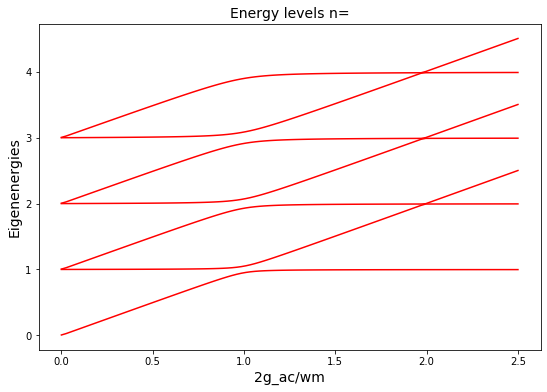

In [7]:
fig, ax = plt.subplots(1,1, figsize=(9,6))

#for n in range(len(g_aclist)):
    
for i in range(1,8):     # range(7)
        
    #ax.plot(g_aclist , ( E_Gf[:,m]), 'b')    
    ax.plot(2*g_aclist/wm ,((evals_mt[:,i]-evals_mt[:,0])/wm), 'r')
    
ax.set_xlabel('2g_ac/wm',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('Energy levels n=' ,fontsize=(14));